# TACHE 6 : xrd-Correction

**Corrections apportées :** Ce notebook est une version améliorée du notebook "xrd".<br>
Rien n'a été corrigé mais des commentaires explicatifs ont été ajoutés dans les cellules de texte ainsi que dans le code afin de faciliter la compréhension.<br>

Dans ce notebook, nous déterminons les 3 premiers pics du diffractogramme du cristal SrCN₂ pour un rayonnement X incident CuKα de longueur d’onde λ=1.54060 Å.<br>
Pour chacun des 3 pics, nous spécifions l'intensité, les indices hkl et l'angle 2$\theta$ associés.
En effet, l'angle entre l'onde d'incidence et l'onde d'observation vaut 2$\theta$.<br>
Nous utilisons la structure primitive afin d'extraire ces informations de notre cristal.

In [1]:
from mp_api.client import MPRester
from jupyter_jsmol.pymatgen import quick_view
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from pymatgen.analysis.diffraction.xrd import XRDCalculator
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
mp_key = "hGFJONMWFhZMzX55ulNNTvmOkGE07nJS"
mp_id = "mp-12317"

In [3]:
with MPRester(mp_key) as m:
    prim_struc = m.get_structure_by_material_id(mp_id)

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

## Affichage du diffractogramme

Pour qu’un pic apparaisse sur un diffractogramme, il faut que les rayons X réfléchis par différents plans cristallins interfèrent de manière constructive. Cela signifie que la différence de chemin parcouru par les rayons doit correspondre à un multiple entier de la longueur d’onde. Cette condition est décrite par la loi de Bragg :
$$
n\lambda = 2d \sin\theta
$$
où d est la distance entre les plans cristallins, $\theta$ l’angle d’incidence, $\lambda$ la longueur d’onde du rayon X, et n l'ordre de la réflexion.<br>
La distance $d$ entre deux plans $(h k l)$ consécutifs du réseau direct est lié à la norme du vecteur v du réseau réciproque par la relation :
$$ d = \frac{2\pi}{|v|} = \frac{2\pi}{|ha^* + kb^* + lc^*|}$$<br>
Le schéma ci-dessous, extrait du cours, illustre clairement la condition de Bragg et le principe de la diffraction constructive.

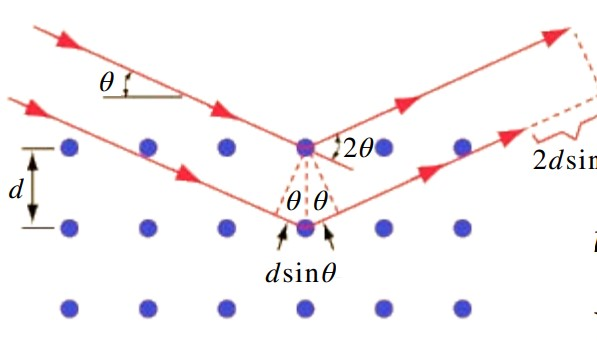

In [4]:
display(Image(filename="Bragg.jpg"))

Chaque pic observé dans le diffractogramme correspond donc à une famille de plans cristallins (hkl) qui satisfait cette condition.<br>
Les valeurs 2$\theta$ en abscisse du diffractogramme sont liées à l'espacement $d$ entre deux plans.
Ainsi, par la loi de Bragg, chaque angle $2\theta$ mesuré permet de déterminer la distance interplanaire $d$ associée à une famille de plans $hkl$.

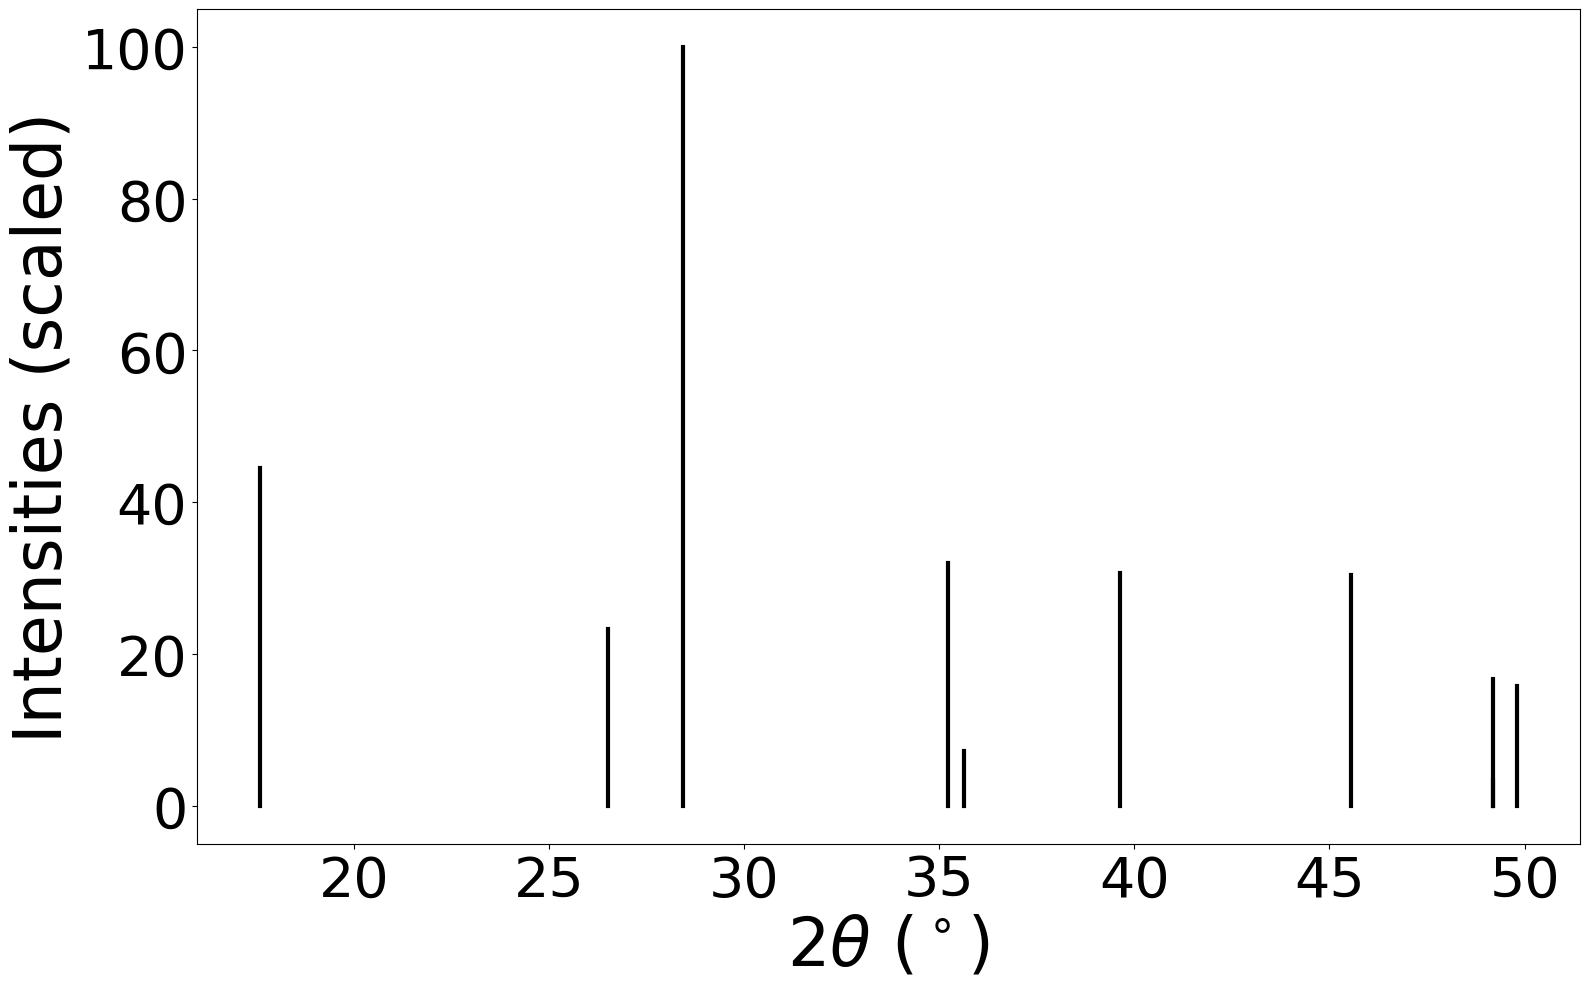

In [5]:
#Création d'un objet XRDCalculator
xrd = XRDCalculator(1.54060)
difr = xrd.get_pattern(prim_struc)

#Affichage du diffractogramme 
fig = xrd.get_plot(prim_struc, annotate_peaks = True, two_theta_range=[0, 50])
plt.show()

## Analyse du premier pic du diffractogramme

In [6]:
#Angle du premier pic
angle =difr.x[0]
#Intensité du premier pic
intensité = difr.y[0]
#Indices hkl du premier pic
hkl = difr.hkls[0]

print('Premier pic pour un rayonnement X incident CuKα de longueur d’onde: λ=1.54060 Å')
print('Angle 2θ entre les 2 rayons [°] : ' + str(angle ))
print('Intensité du premier pic : ' + str(intensité))
print('Indices hkl du premier pic :' + str(hkl[0]['hkl']))

Premier pic pour un rayonnement X incident CuKα de longueur d’onde: λ=1.54060 Å
Angle 2θ entre les 2 rayons [°] : 17.595936331310565
Intensité du premier pic : 44.518390935645606
Indices hkl du premier pic :(1, 1, 1)


## Analyse du deuxième pic du diffractogramme

In [7]:
#Angle du deuxième pic
angle =difr.x[1]
#Intensité du deuxième pic
intensité = difr.y[1]
#Indices hkl du deuxième pic
hkl = difr.hkls[1]

print('Deuxième pic pour un rayonnement X incident CuKα de longueur d’onde: λ=1.54060 Å')
print('Angle 2θ entre les 2 rayons [°] : ' + str(angle ))
print('Intensité du deuxième pic : ' + str(intensité))
print('Indices hkl du deuxième pic :' + str(hkl[0]['hkl']))

Deuxième pic pour un rayonnement X incident CuKα de longueur d’onde: λ=1.54060 Å
Angle 2θ entre les 2 rayons [°] : 26.51097673374749
Intensité du deuxième pic : 23.25290092826169
Indices hkl du deuxième pic :(1, 0, 0)


## Analyse du troisième pic du diffractogramme

In [8]:
#Angle du premier pic
angle =difr.x[2]
#Intensité du premier pic
intensité = difr.y[2]
#Indices hkl du premier pic
hkl = difr.hkls[2]

print('Troisième pic pour un rayonnement X incident CuKα de longueur d’onde: λ=1.54060 Å')
print('Angle 2θ entre les 2 rayons [°] : ' + str(angle ))
print('Intensité du troisième pic : ' + str(intensité))
print('Indices hkl du troisième pic :' + str(hkl[0]['hkl']))

Troisième pic pour un rayonnement X incident CuKα de longueur d’onde: λ=1.54060 Å
Angle 2θ entre les 2 rayons [°] : 28.44762709109211
Intensité du troisième pic : 100.0
Indices hkl du troisième pic :(1, 1, 0)
